<a href="https://colab.research.google.com/github/PX2145-2025/week-6-b-pickering-robin-r2/blob/main/Year_2_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

In [222]:
# Question 1

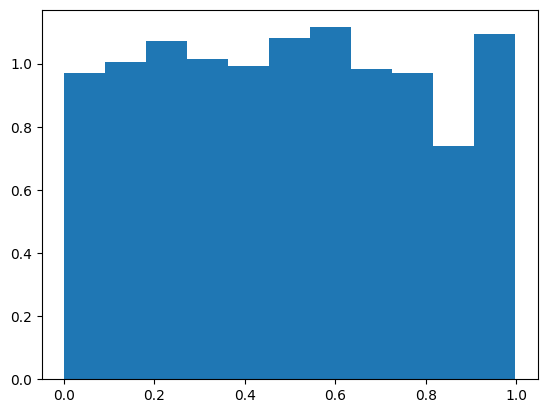

In [223]:
N_uniform_e3 = int(1e3)
x_uniform_e3 = random(N_uniform_e3)
plt.hist(x_uniform_e3, bins='auto',density=True);

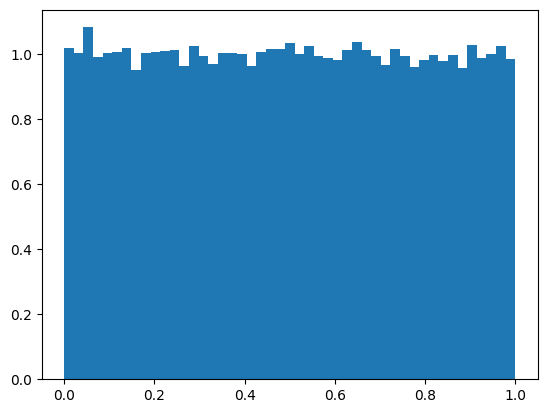

In [224]:
N_uniform_e5 = int(1e5)
x_uniform_e5 = random(N_uniform_e5)
plt.hist(x_uniform_e5, bins='auto',density=True);

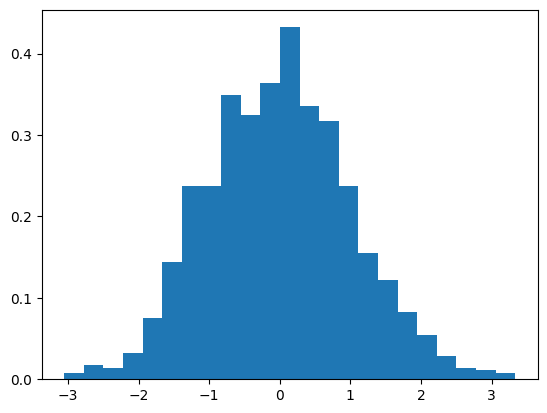

In [225]:
N_normal_e3 = int(1e3)
y_normal_e3 = normal(loc=0.0, scale=1.0, size=N_normal_e3)
plt.hist(y_normal_e3, bins='auto',density=True);

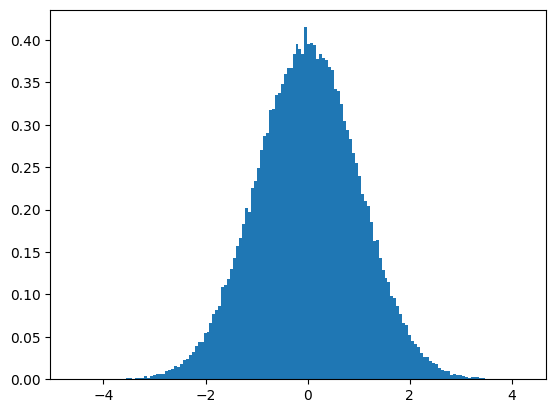

In [226]:
N_normal_e5 = int(1e5)
y_normal_e5 = normal(loc=0.0, scale=1.0, size=N_normal_e5)
plt.hist(y_normal_e5, bins='auto',density=True);

In [227]:
# Increasing the value of N produces a histogram which more closely resembles the expected shape.
# Any single data point throws off the overall shape more noticeably with less overall data
# The uniform distribution has bins are closer to each other
# The gaussian distribution has a smoother gaussian curve

In [228]:
# Question 2

3.15512
CPU times: user 41.2 ms, sys: 1.02 ms, total: 42.2 ms
Wall time: 43.4 ms


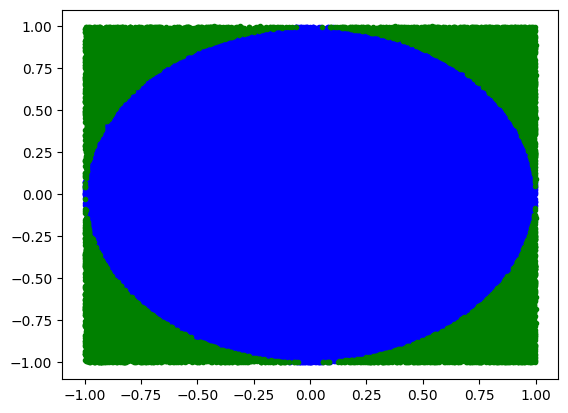

In [229]:
%%time

N = int(1e5)

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.plot(x[inpond==True], y[inpond==True],'b.')
plt.plot(x[inpond==False], y[inpond==False],'g.')

In [230]:
# Wall Time is typically ~ 30ms (N = 10000)

3.1444
CPU times: user 59.8 s, sys: 2.47 s, total: 1min 2s
Wall time: 1min 3s


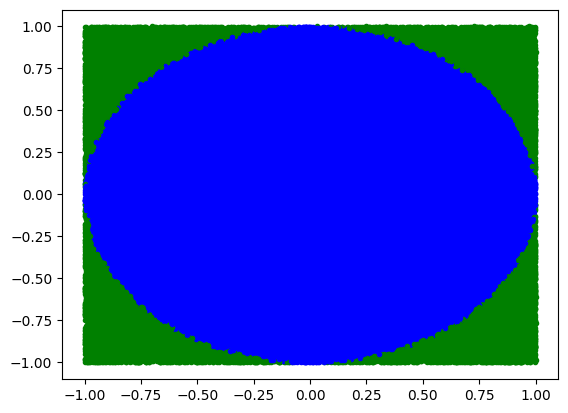

In [231]:
%%time

N=int(1e5)
n=0
plt.figure() # Create a new figure for this plot
for i in range (N):
    x = 2*random()-1
    y = 2*random()-1
    r = np.sqrt(x*x+y*y)
    if r <= 1.0:
        n+=1 # adds 1 to n
        plt.plot(x, y, 'b.')
    else:
        plt.plot(x, y, 'g.')

print(4*n/N)

In [232]:
# Wall Time is typically ~ 1 minute (600000ms), 20000x longer than vector method, with the plotting taking ~ 1 additional minute to appear (N = 10000)

In [233]:
# Question 3

In [234]:
def f(x):
    return np.sin(x) * np.tan(x)

N = int(1e5)
x = np.random.uniform(0, np.pi/4, N)
s = np.sum(f(x))
integral = (np.pi / 4) * s / N
print('Approximate result for {} points: {}'.format(N, integral))

Approximate result for 100000 points: 0.1749922883351337


In [235]:
# True value (from Wolfrom Alpha) is 0.17426680583300, my estimation is generally accurate to at least 2 s.f. when 100000 points are used

In [236]:
def g(N):
  x = np.random.uniform(0, np.pi/4, N)
  s = np.sum(f(x))
  integral = (np.pi / 4) * s / N
  return integral

In [241]:
g(10) # g(N) gives a MC integral value for a given N value

np.float64(0.2239746311723692)

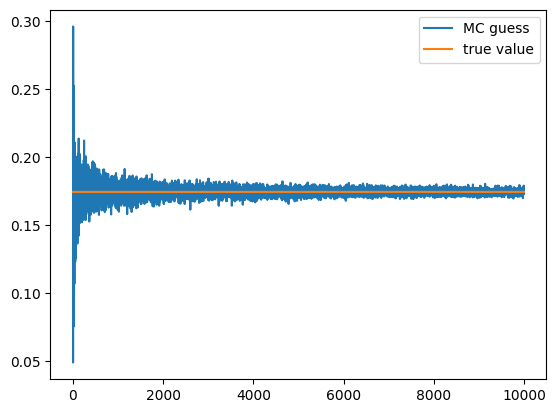

In [242]:
Number = 10000
a = np.linspace(1, Number, Number)
b = np.array([g(i) for i in range(1, (Number + 1))])
plt.plot(a,b, label = "MC guess")
plt.plot(a, np.linspace(0.17426680583300, 0.17426680583300,len(a)), label = "true value")
plt.legend()


In [239]:
# Larger values of N give diminishing returns after N = ~ 4000